# Exploratory data analysis
## Research project
### 42180 Quantitative modelling of behaviour

------

**Group 11** <br>

------

Camille Babin <br>
Martine Grangé <br>
Mikkel Johansen <br>
Kyriakos Michailidis <br>
Jiri Spitzer

------

Import libraries and enable inline plotting

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from collections import Counter
from re import search as Search
from IPython.display import display

In [19]:
%matplotlib inline

Disable warnings

In [20]:
warnings.filterwarnings('ignore')

Load data

In [21]:
data_path = r'.\data\elisa_sp_6alt.xlsx'

In [22]:
df = pd.read_excel(data_path)
df.head(2)

,X1,ID,CHOICE,Alt_Description_ICV1,CarClass_ICV1,CarType_ICV1,Purchaseprice_ICV1,Operationcost_ICV1,Yearlycost__ICV1,Range_ICV1,...,Size_PHEV2,CO2_PHEV2,Charginginfrastructure_PHEV2,Chargingspeed_PHEV2,Homedistnearestcharger_PHEV2,Homechargeravailability_PHEV2,CHOICE18,c_Gender,c_Age,q9
0,4,1,5,1,2,1,150000,1.22,4300,898,...,5,150,0,0,0,0,14,2,40,4
1,5,1,5,1,2,1,165000,1.11,5912,1097,...,4,169,0,0,0,0,14,2,40,4


#### Explore data

Size of the dataset

In [23]:
print("Row count:     ", df.shape[0]) 
print("Column count:  ", df.shape[1])

Row count:      11844
Column count:   91


Check for missing values

In [24]:
stat = []
for col in df.columns: 
    a = list(zip(Counter(df[col].isnull()).keys(), Counter(df[col].isnull()).values()))
    try:
        if (a[0][0] == True):
            stat.append([col, a[0][1]])
        elif (a[1][0] == True):
            stat.append([col, a[1][1]])
    except:
        stat.append([col, 0])
df_stat = pd.DataFrame(stat).rename(columns={0:'Column name',1:'N/A count'})
df_stat = df_stat.sort_values(by=["N/A count"], ascending=False)
df_stat["N/A %"] = round(df_stat["N/A count"] / len(df) * 100,2)
df_stat.head(5)

,Column name,N/A count,N/A %
0,X1,0,0.0
68,CO2_PHEV1,0,0.0
66,Acceleration_PHEV1,0,0.0
65,Range_PHEV1,0,0.0
64,Yearlycost__PHEV1,0,0.0


Slect specific columns

In [25]:
col = df.columns.to_list()

pattern = [
    "Purchaseprice_", "cost_", "cost_", "CO2_", "Charging",
    "Range", "Acceleration", "Home", "Size"
]
col_s = []
for c in col:
    for p in pattern:
        if Search(p,c):
            col_s.append(c)
            break
            
print(col_s)
print(len(col_s))

['Purchaseprice_ICV1', 'Operationcost_ICV1', 'Yearlycost__ICV1', 'Range_ICV1', 'Acceleration_ICV1', 'Size_ICV1', 'CO2_ICV1', 'Charginginfrastructure_ICV1', 'Chargingspeed_ICV1', 'Homedistnearestcharger_ICV1', 'Homechargeravailability_ICV1', 'Purchaseprice_ICV2', 'Operationcost_ICV2', 'Yearlycost__ICV2', 'Range_ICV2', 'Acceleration_ICV2', 'Size_ICV2', 'CO2_ICV2', 'Charginginfrastructure_ICV2', 'Chargingspeed_ICV2', 'Homedistnearestcharger_ICV2', 'Homechargeravailability_ICV2', 'Purchaseprice_BEV1', 'Operationcost_BEV1', 'Yearlycost__BEV1', 'Range_BEV1', 'Acceleration_BEV1', 'Size_BEV1', 'CO2_BEV1', 'Charginginfrastructure_BEV1', 'Chargingspeed_BEV1', 'Homedistnearestcharger_BEV1', 'Homechargeravailability_BEV1', 'Purchaseprice_BEV2', 'Operationcost_BEV2', 'Yearlycost__BEV2', 'Range_BEV2', 'Acceleration_BEV2', 'Size_BEV2', 'CO2_BEV2', 'Charginginfrastructure_BEV2', 'Chargingspeed_BEV2', 'Homedistnearestcharger_BEV2', 'Homechargeravailability_BEV2', 'Purchaseprice_PHEV1', 'Operationcost_P

In [26]:
df2 = df.copy(deep=True)
df2 = df2[col_s]

In [27]:
# pd.options.display.max_columns = None

Basic descriptive statistics

In [28]:
col = df2.columns.to_list()
cat = ["ICV1","ICV2","BEV1","BEV2","PHEV1","PHEV2"]
col_s = []
for x in cat:
    for c in col:
        if Search(x,c):
            col_s.append(c)
    display(df2[col_s].describe().T)
    col_s.clear()

,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV1,11844.0,323794.579534,220690.048105,84000.00,185000.0,287500.00,430000.00,1600000.00
Operationcost_ICV1,11844.0,1.130655,0.181773,0.81,1.0,1.11,1.25,1.93
Yearlycost__ICV1,11844.0,6743.486407,2489.554132,3458.00,4783.0,5978.00,8175.00,13979.00
Range_ICV1,11844.0,919.882894,131.609390,735.00,812.0,898.00,997.00,1097.00
Acceleration_ICV1,11844.0,12.104188,2.614263,6.00,10.0,12.00,14.00,16.00
Size_ICV1,11844.0,3.697737,1.115545,2.00,3.0,4.00,5.00,5.00
CO2_ICV1,11844.0,132.939379,31.390587,70.00,100.0,138.00,161.00,182.00
Charginginfrastructure_ICV1,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.00,0.00
Chargingspeed_ICV1,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.00,0.00
Homedistnearestcharger_ICV1,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.00,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_ICV2,11844.0,383955.969267,314005.248600,84000.00,185000.0,287500.00,500000.0,1600000.00
Operationcost_ICV2,11844.0,1.158716,0.219698,0.81,1.0,1.12,1.3,1.93
Yearlycost__ICV2,11844.0,7315.013509,2977.313393,3458.00,4837.0,5978.00,9992.0,13979.00
Range_ICV2,11844.0,918.576241,131.561407,735.00,812.0,898.00,997.0,1097.00
Acceleration_ICV2,11844.0,11.742317,2.746849,6.00,10.0,12.00,14.0,16.00
Size_ICV2,11844.0,3.744090,1.189307,2.00,3.0,4.00,5.0,5.00
CO2_ICV2,11844.0,133.165316,31.696673,70.00,100.0,138.00,161.0,182.00
Charginginfrastructure_ICV2,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00
Chargingspeed_ICV2,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00
Homedistnearestcharger_ICV2,11844.0,0.000000,0.000000,0.00,0.0,0.00,0.0,0.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV1,11844.0,325876.815265,215596.599891,90000.00,220000.00,275000.00,350000.0,1600000.00
Operationcost_BEV1,11844.0,0.654107,0.099738,0.49,0.57,0.63,0.7,0.99
Yearlycost__BEV1,11844.0,6888.313999,2811.127431,3610.00,4997.00,5899.00,7992.0,15827.00
Range_BEV1,11844.0,346.086626,139.712937,100.00,230.00,350.00,450.0,600.00
Acceleration_BEV1,11844.0,8.288923,2.393546,3.00,7.00,8.00,10.0,13.00
Size_BEV1,11844.0,3.697737,1.115545,2.00,3.00,4.00,5.0,5.00
CO2_BEV1,11844.0,28.060284,23.805335,0.00,0.00,18.00,35.0,70.00
Charginginfrastructure_BEV1,11844.0,75.101317,33.512817,30.00,60.00,90.00,120.0,120.00
Chargingspeed_BEV1,11844.0,96.040611,41.464524,35.00,75.00,100.00,150.0,160.00
Homedistnearestcharger_BEV1,11844.0,162.803951,222.873162,0.00,0.00,0.00,300.0,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_BEV2,11844.0,387880.361364,309721.993958,90000.00,220000.00,275000.00,500000.00,1600000.00
Operationcost_BEV2,11844.0,0.671738,0.116786,0.49,0.57,0.67,0.75,0.99
Yearlycost__BEV2,11844.0,7641.662614,3477.550326,3610.00,4997.00,6107.00,9769.00,15827.00
Range_BEV2,11844.0,346.716481,139.905957,100.00,250.00,350.00,450.00,600.00
Acceleration_BEV2,11844.0,8.193431,2.495827,3.00,6.00,8.00,10.00,13.00
Size_BEV2,11844.0,3.744090,1.189307,2.00,3.00,4.00,5.00,5.00
CO2_BEV2,11844.0,28.115417,23.904361,0.00,0.00,18.00,35.00,70.00
Charginginfrastructure_BEV2,11844.0,75.101317,33.512817,30.00,60.00,90.00,120.00,120.00
Chargingspeed_BEV2,11844.0,97.508021,41.099600,35.00,75.00,100.00,125.00,160.00
Homedistnearestcharger_BEV2,11844.0,162.803951,222.873162,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV1,11844.0,346058.806147,237965.117657,84000.00,200000.00,287500.00,430000.00,1600000.00
Operationcost_PHEV1,11844.0,1.105469,0.185237,0.75,0.95,1.11,1.23,1.79
Yearlycost__PHEV1,11844.0,6476.955420,2337.652254,3500.00,4933.00,5636.00,7529.00,13688.00
Range_PHEV1,11844.0,54.154002,25.156058,20.00,40.00,50.00,75.00,100.00
Acceleration_PHEV1,11844.0,8.299983,2.402488,3.00,7.00,9.00,11.00,13.00
Size_PHEV1,11844.0,3.697737,1.115545,2.00,3.00,4.00,5.00,5.00
CO2_PHEV1,11844.0,123.611702,28.273010,70.00,97.75,130.00,150.00,169.00
Charginginfrastructure_PHEV1,11844.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV1,11844.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV1,11844.0,162.803951,222.873162,0.00,0.00,0.00,300.00,600.00


,count,mean,std,min,25%,50%,75%,max
Purchaseprice_PHEV2,11844.0,412713.272543,326033.362631,84000.00,200000.00,287500.00,575000.00,1600000.00
Operationcost_PHEV2,11844.0,1.134606,0.218190,0.75,0.95,1.11,1.27,1.79
Yearlycost__PHEV2,11844.0,7082.948159,2860.516906,3500.00,4933.00,6030.00,9202.00,13688.00
Range_PHEV2,11844.0,55.222053,25.571928,20.00,40.00,50.00,76.25,100.00
Acceleration_PHEV2,11844.0,8.191489,2.505077,3.00,6.00,8.00,10.00,13.00
Size_PHEV2,11844.0,3.744090,1.189307,2.00,3.00,4.00,5.00,5.00
CO2_PHEV2,11844.0,124.075228,28.811681,70.00,97.75,130.00,150.00,169.00
Charginginfrastructure_PHEV2,11844.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Chargingspeed_PHEV2,11844.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
Homedistnearestcharger_PHEV2,11844.0,162.803951,222.873162,0.00,0.00,0.00,300.00,600.00


Plot Boxplots

In [59]:
'''
for c in df2:
    df2.boxplot(column = str(c))
    plt.show()
''';

In [60]:
'''
fig, axes = plt.subplots(11, 6, sharex=True, figsize=(18,34))
#fig.suptitle('Boxplots for each continuous variable')

for i,col in enumerate(df2.columns.to_list()):
    x = i // 6
    y = i % 6
    sns.boxplot(ax=axes[x, y], data=df2[col].to_list())
    axes[x, y].set_title(col)
''';

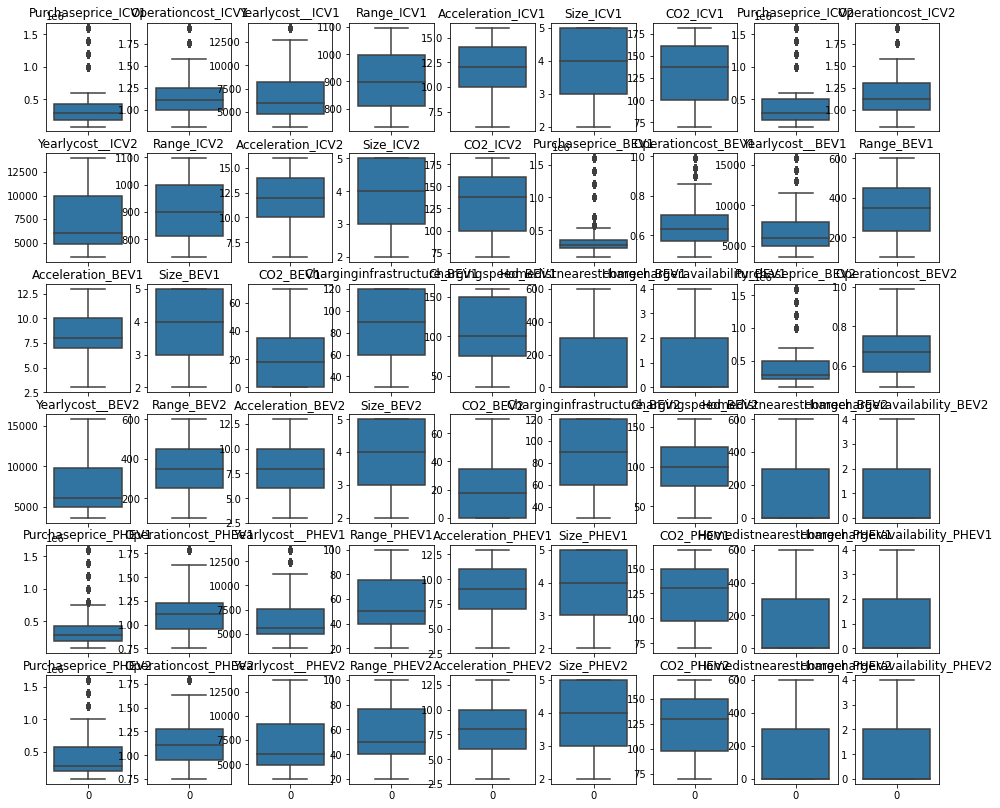

In [57]:
df3 = df2.copy(deep=True)
col_drop = [
    'Charginginfrastructure_ICV1', 'Chargingspeed_ICV1', 'Homedistnearestcharger_ICV1', 'Homechargeravailability_ICV1',
    'Charginginfrastructure_ICV2', 'Chargingspeed_ICV2', 'Homedistnearestcharger_ICV2', 'Homechargeravailability_ICV2',
    'Charginginfrastructure_PHEV1', 'Chargingspeed_PHEV1', 'Charginginfrastructure_PHEV2', 'Chargingspeed_PHEV2'
]
df3 = df3.drop(col_drop, axis = 1) 

fig, axes = plt.subplots(6, 9, sharex=True, figsize=(16,14))

for i,col in enumerate(df3.columns.to_list()):
    x = i // 9
    y = i % 9
    sns.boxplot(ax=axes[x, y], data=df3[col].to_list())
    axes[x, y].set_title(col)

Display choices

In [13]:
df.groupby('CHOICE')['CHOICE'].count()

CHOICE
0       7
1    2829
2    1318
3    2589
4    1307
5    2656
6    1138
Name: CHOICE, dtype: int64

In [14]:
choice = [x for x in range(0,7)]
choice_cnt = df.groupby('CHOICE')['CHOICE'].count().to_list()
choice_prc = [round(x * 100. / sum(choice_cnt),4) for x in choice_cnt]

choice_stat = pd.DataFrame(
    {
        "choice": choice,
        "count": choice_cnt,
        "ratio": choice_prc
    }
)

choice_stat.sort_values(by=['count'], ascending=False)

,choice,count,ratio
1,1,2829,23.8855
5,5,2656,22.4249
3,3,2589,21.8592
2,2,1318,11.1280
4,4,1307,11.0351
6,6,1138,9.6082
0,0,7,0.0591


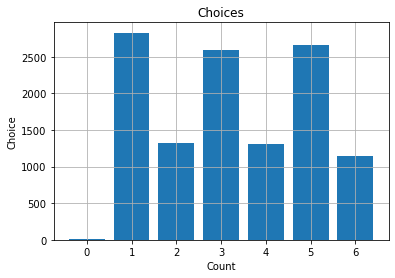

In [15]:
plt.bar(choice_stat["choice"].to_list(),choice_stat["count"].to_list())
plt.title('Choices')
plt.xlabel('Count')
plt.ylabel('Choice')
plt.grid(True)
plt.show()

Demographic data

In [92]:
df4 = df.copy(deep=True)
check_sum =len(df4)

In [93]:
print("Min. age:",df4.c_Age.min())
print("Max. age:",df4.c_Age.max())

Min. age: 18
Max. age: 90


In [94]:
df4 = df4.drop_duplicates(subset=["ID"])

Check sum

In [96]:
int(check_sum / 4) == int(len(df4))

True

In [99]:
df4['c_Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 90], dtype=int64)

In [102]:
df4['age_group'] = -1
df4['age_group'] = np.where(df4['c_Age'] <= 30,1,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 30) & (df4['c_Age'] <= 40),2,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 40) & (df4['c_Age'] <= 55),3,df4['age_group'])
df4['age_group'] = np.where((df4['c_Age'] > 55) & (df4['c_Age'] <= 75),4,df4['age_group'])
df4['age_group'] = np.where(df4['c_Age'] > 75,5,df4['age_group'])

In [106]:
print("Check age_group:",df4[df4['age_group'] == -1]['ID'].count())

Check age_group: 0


In [107]:
age_group = [x for x in range(1,6)]
age_cnt = df4.groupby('age_group')['age_group'].count().to_list()
age_prc = [round(x * 100. / sum(age_cnt),4) for x in age_cnt]

age_stat = pd.DataFrame(
    {
        "age_group": age_group,
        "count": age_cnt,
        "ratio": age_prc
    }
)

age_stat.sort_values(by=['count'], ascending=False)

,age_group,count,ratio
2,3,974,32.8943
3,4,964,32.5566
1,2,465,15.7042
0,1,449,15.1638
4,5,109,3.6812


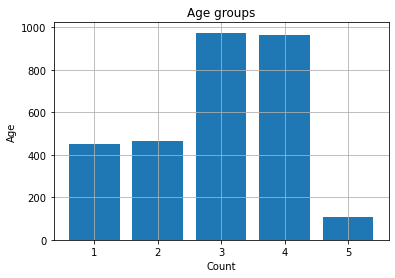

In [108]:
plt.bar(age_stat["age_group"].to_list(),age_stat["count"].to_list())
plt.title('Age groups')
plt.xlabel('Count')
plt.ylabel('Age')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='c_Gender'>

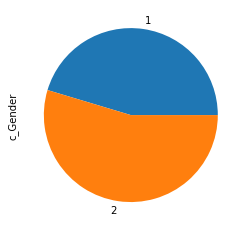

In [112]:
df4.groupby('c_Gender')['c_Gender'].count().plot(kind='pie', y='Gender')